In [ ]:
# About this project, Lesley Brewton
#Beginning cereal dataset for 80 brands of cereal: Nutrition Linear Regression
#Categorical – test run - Converting Numeric Data to Categorical Data (For example, if you have a data set of people’s heights in inches, such as 59.5, 64.0 and 75.5, #you might want to convert this numeric data into categorical data, for example 0, 1, and 2, to represent short, medium, and tall. Informally, this process is #sometimes called binning data)
#1.	Question: what does the cereal rating mean and how can you maximize it? ranking is out of 100 with the data coming back between 0  and 100. Note: I want to try #to see if it is nutritious or not nutritious, and I want the rating to be based on health aspects.
#•	Analyze key characteristics such as:   Type:
#o	Cold
#o	Hot
#•	Calories: Calories per serving
#•	Protein: Grams of protein
#•	Fat: Grams of fat
#•	Sodium: Grams of sodium (Note: The original data contains milligrams.)
#•	Fiber: Grams of dietary fiber
#•	Carbs: Grams of complex carbohydrates
#•	Sugars: Grams of sugars
#•	Potassium: Grams of potassium (Note: The original data contains milligrams.)
#•	Vitamins: Vitamins and minerals: 0, 25, or 100, indicating the typical percentage of FDA recommended. 
#•	Rating: A rating of the cereals
#
#2.	Hypotheses and tests outcome that you should see:  Calories: Calories per serving
#•	Brand of cereal
#•	Calories in cereal from different sources
#•	Carbo, sugars, potassium 
#•	Fiber with vitamins and sodium
#•	The relation of serving size to amount calories
 
#3.	Findings: 
#Key cereal characteristics:	Results:
#•	calories	Healthy characteristics DID have an impact
#•	Protein 	Unhealthy characteristics like calories and sugar when adding more to cereal did have a major effect
#•	fat	Vitamins  shows a negative impact because it came with sodium
#•	sodium	
#•	fiber	
#•	carbohydrates	
#•	sugars	
#•	potassium	
#•	vitamins	

#Key interactions:
#•	sodium correlates with vitamin content for negative trend
#•	carbohydrates with proteins have a positive interaction
#•	not interaction between vitamins and protein
#•	vitamins and potassium neither interact nor are correlated
#•	the interaction between calories and fat yields a positive interaction for rating

#To get a positive outcome on cereal nutrition we should:

#•	reducing sugar in cereal while reducing overall calories
#•	illuminate the amount of vitamins with sodium
#•	make carbohydrates protein based

This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/projct-cereal/cereal.csv


In [ ]:
#Importing packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
#Display and explore beginning cereal dataset for 80 brands of cereal
data = pd.read_csv('/kaggle/input/projct-cereal/cereal.csv')
print(data)
# Create DataFrame
df = pd.DataFrame(data)


                         name mfr type  calories  protein  fat  sodium  fiber  \
0                   100% Bran   N    C        70        4    1   0.130   10.0   
1           100% Natural Bran   Q    C       120        3    5   0.015    2.0   
2                    All-Bran   K    C        70        4    1   0.260    9.0   
3   All-Bran with Extra Fiber   K    C        50        4    0   0.140   14.0   
4              Almond Delight   R    C       110        2    2   0.200    1.0   
..                        ...  ..  ...       ...      ...  ...     ...    ...   
72                    Triples   G    C       110        2    1   0.250    0.0   
73                       Trix   G    C       110        1    1   0.140    0.0   
74                 Wheat Chex   R    C       100        3    1   0.230    3.0   
75                   Wheaties   G    C       100        3    1   0.200    3.0   
76        Wheaties Honey Gold   G    C       110        2    1   0.200    1.0   

    carbo  sugars  potassiu

In [ ]:
data.head(10) 

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potassium,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,0.130,10.0,5.0,6,0.280,25,3,1.00,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,0.015,2.0,8.0,8,0.135,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,0.260,9.0,7.0,5,0.320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,0.140,14.0,8.0,0,0.330,25,3,1.00,0.50,93.704912
4,Almond Delight,R,C,110,2,2,0.200,1.0,14.0,8,0.330,25,3,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,0.180,1.5,10.5,10,0.070,25,1,1.00,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,0.125,1.0,11.0,14,0.030,25,2,1.00,1.00,33.174094
7,Basic 4,G,C,130,3,2,0.210,2.0,18.0,8,0.100,25,3,1.33,0.75,37.038562
8,Bran Chex,R,C,90,2,1,0.200,4.0,15.0,6,0.125,25,1,1.00,0.67,49.120253
9,Bran Flakes,P,C,90,3,0,0.210,5.0,13.0,5,0.190,25,3,1.00,0.67,53.313813


In [ ]:
#Decribes what this data is about
data.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potassium,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,0.159675,2.151948,14.597403,6.922078,0.100403,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,0.083832,2.383364,4.278956,4.444885,0.075192,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.001000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,0.130000,1.000000,12.000000,3.000000,0.040000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,0.180000,2.000000,14.000000,7.000000,0.090000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,0.210000,3.000000,17.000000,11.000000,0.120000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,0.320000,14.000000,23.000000,15.000000,0.330000,100.000000,3.000000,1.500000,1.500000,93.704912


In [ ]:
#explores data of the last 5 cereal brands
data.tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potassium,vitamins,shelf,weight,cups,rating
72,Triples,G,C,110,2,1,0.25,0.0,21.0,3,0.060,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,0.14,0.0,13.0,12,0.025,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,0.23,3.0,17.0,3,0.115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,0.20,3.0,17.0,3,0.110,25,1,1.0,1.00,51.592193
76,Wheaties Honey Gold,G,C,110,2,1,0.20,1.0,16.0,8,0.060,25,1,1.0,0.75,36.187559


In [ ]:
#The code is passing data as an overview; 
#reads 5 rows of data, null values for each column, & 
#summarizes statistical values about the dataset
def overview():
    data = pd.read_csv("/kaggle/input/projct-cereal/cereal.csv")
    print("The first 5 rows of data are:\n")
    print(data.head())
    print("\n\n\nDataset has {} rows and {} columns".format(data.shape[0], data.shape[1]))
    print("\n\n\nDatatype: \n")
    print(data.dtypes)
    print("\n\n\nThe number of null values for each column are: \n")
    print(data.isnull().sum())
    print("\n\n\nData summary: \n")
    print(data.describe())
    return data
data = overview()


The first 5 rows of data are:

                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1   0.130   10.0   
1          100% Natural Bran   Q    C       120        3    5   0.015    2.0   
2                   All-Bran   K    C        70        4    1   0.260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0   0.140   14.0   
4             Almond Delight   R    C       110        2    2   0.200    1.0   

   carbo  sugars  potassium  vitamins  shelf  weight  cups     rating  
0    5.0       6      0.280        25      3     1.0  0.33  68.402973  
1    8.0       8      0.135         0      3     1.0  1.00  33.983679  
2    7.0       5      0.320        25      3     1.0  0.33  59.425505  
3    8.0       0      0.330        25      3     1.0  0.50  93.704912  
4   14.0       8      0.330        25      3     1.0  0.75  34.384843  



Dataset has 77 rows and 16 columns



Datatype: 

nam

In [ ]:
# Count the number of -1 in carbo and sugars column
data[data == -1].count(axis=0)

name         0
mfr          0
type         0
calories     0
protein      0
fat          0
sodium       0
fiber        0
carbo        1
sugars       1
potassium    0
vitamins     0
shelf        0
weight       0
cups         0
rating       0
dtype: int64

In [ ]:
# Remove rows that are affected with values less than 0 in the associated columns
# Count the number of -1 values in the specified columns
# Remove rows with negative values in the associated columns
negative_counts_before_removal = data[data == -1].count(axis=0)
print("Counts of -1 values before removal:\n", negative_counts_before_removal)
# Remove rows with negative values in the associated columns

# Count the number of remaining -1 values after removing rows
negative_counts_after_removal = data[data == -1].count(axis=0)
print("Counts of -1 values after removal:\n", negative_counts_after_removal)


Counts of -1 values before removal:
 name         0
mfr          0
type         0
calories     0
protein      0
fat          0
sodium       0
fiber        0
carbo        1
sugars       1
potassium    0
vitamins     0
shelf        0
weight       0
cups         0
rating       0
dtype: int64
Counts of -1 values after removal:
 name         0
mfr          0
type         0
calories     0
protein      0
fat          0
sodium       0
fiber        0
carbo        1
sugars       1
potassium    0
vitamins     0
shelf        0
weight       0
cups         0
rating       0
dtype: int64


In [ ]:

#Show highest and lowest rating of manufacturers by counting the number of manufacturers
import pandas as pd
data = pd.DataFrame({'mfr': ['A','G','K','N','P','Q','R']})
mfr_counts = data["mfr"].value_counts()
print(mfr_counts)
# Create DataFrame
df = pd.DataFrame(data)
# Print the output.
print(df)

A    1
G    1
K    1
N    1
P    1
Q    1
R    1
Name: mfr, dtype: int64
  mfr
0   A
1   G
2   K
3   N
4   P
5   Q
6   R


/tmp/ipykernel_32/1137205649.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = data.corr()


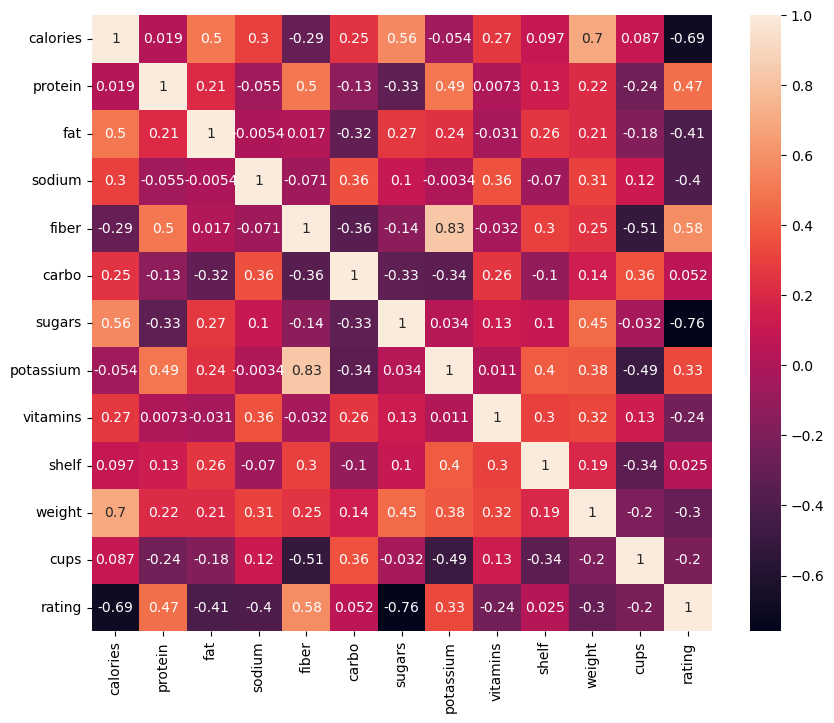

In [ ]:
#A Linear regression to predict various unknowns and categorical variables
#correlation matrix created to show causation negative affect of ingredients

#from sklearn.preprocessing import LabelEncoder 
data = pd.read_csv('/kaggle/input/projct-cereal/cereal.csv')
plt.figure(figsize=(10, 8))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()